# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100329., 100195., 100172.,  99665.,  99927.,  99398.,  99837.,
        100246.,  99980., 100251.]),
 array([ 1.00033374, 10.90026498, 20.80019623, 30.70012747, 40.60005871,
        50.49998996, 60.3999212 , 70.29985245, 80.19978369, 90.09971493,
        99.99964618]),
 <a list of 10 Patch objects>)

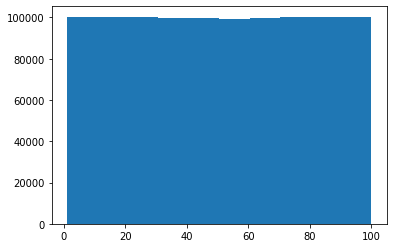

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

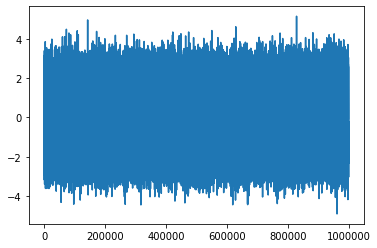

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([4.40000e+01, 1.87600e+03, 2.71180e+04, 1.58099e+05, 3.59690e+05,
        3.22524e+05, 1.14039e+05, 1.57830e+04, 8.03000e+02, 2.40000e+01]),
 array([-4.91137259, -3.90543841, -2.89950423, -1.89357005, -0.88763586,
         0.11829832,  1.1242325 ,  2.13016668,  3.13610086,  4.14203504,
         5.14796922]),
 <a list of 10 Patch objects>)

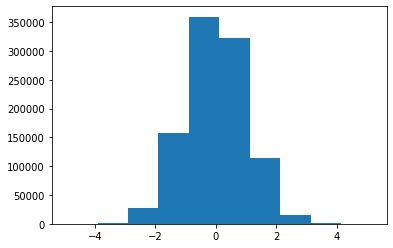

In [6]:
%matplotlib inline
plt.hist(data)

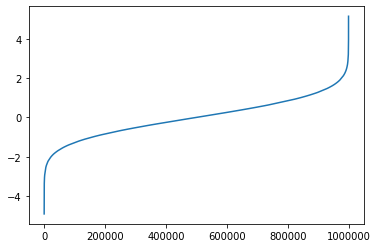

In [7]:
plt.plot(x,sorted(data))

(array([   4.,   50.,  333., 1288., 2601., 3011., 1862.,  690.,  144.,
          17.]),
 array([-4.65086056, -2.70231647, -0.75377238,  1.19477171,  3.1433158 ,
         5.0918599 ,  7.04040399,  8.98894808, 10.93749217, 12.88603626,
        14.83458035]),
 <a list of 10 Patch objects>)

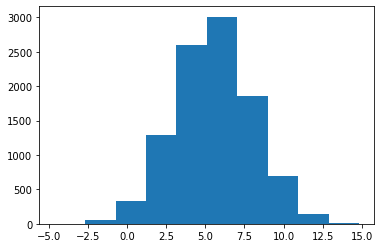

In [13]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [14]:
data = np.random.randn(2,4)
data

array([[-0.32883519,  0.22776428,  0.3884243 ,  0.37589297],
       [-0.496311  ,  0.43007113, -0.43720127,  0.32031913]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

# PI cuadrado

In [16]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141954000000001


(3.141954000000001, [<matplotlib.lines.Line2D at 0x11d7735c0>])

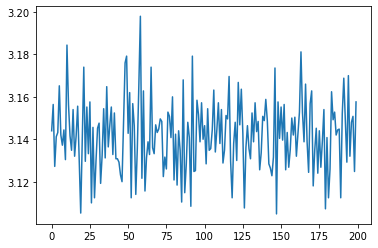

In [17]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [18]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [19]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000221,1.497360,18.495390
std,1.000444,2.501660,7.794021
min,-5.105439,-10.022949,5.000026
25%,-0.675102,-0.188963,11.748782
50%,-0.000341,1.495670,18.483361
75%,0.675028,3.183033,25.243942
max,4.675911,13.185618,31.999999


(array([2.20000e+01, 8.11000e+02, 1.41670e+04, 1.01398e+05, 2.98859e+05,
        3.61793e+05, 1.82132e+05, 3.75620e+04, 3.15100e+03, 1.05000e+02]),
 array([-5.10543885, -4.12730384, -3.14916883, -2.17103381, -1.1928988 ,
        -0.21476379,  0.76337123,  1.74150624,  2.71964125,  3.69777627,
         4.67591128]),
 <a list of 10 Patch objects>)

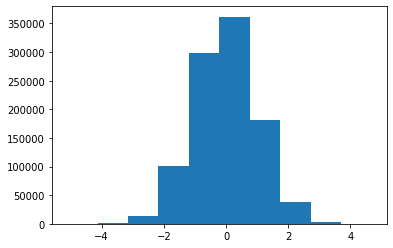

In [20]:
plt.hist(data["A"])

(array([1.15000e+02, 2.89500e+03, 3.11920e+04, 1.51349e+05, 3.28235e+05,
        3.18038e+05, 1.38568e+05, 2.72750e+04, 2.22900e+03, 1.04000e+02]),
 array([-10.02294938,  -7.70209268,  -5.38123599,  -3.06037929,
         -0.73952259,   1.58133411,   3.9021908 ,   6.2230475 ,
          8.5439042 ,  10.86476089,  13.18561759]),
 <a list of 10 Patch objects>)

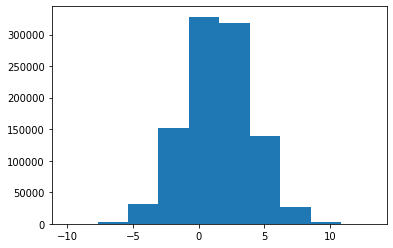

In [21]:
plt.hist(data["B"])

(array([ 99672., 100205., 100188., 100109., 100450., 100066.,  99719.,
         99623.,  99664., 100304.]),
 array([ 5.00002639,  7.70002368, 10.40002097, 13.10001826, 15.80001555,
        18.50001284, 21.20001013, 23.90000742, 26.60000471, 29.300002  ,
        31.99999929]),
 <a list of 10 Patch objects>)

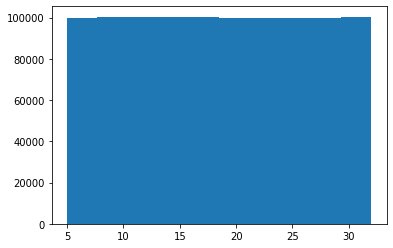

In [22]:
plt.hist(data["C"])

In [23]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [24]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [25]:
colum_names = data.columns.values.tolist()

In [26]:
a = len(colum_names)
a

21

In [28]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [29]:
new_data

,Column Name,A,B
42,State,0.569066,0.237594
43,Account Length,0.768845,0.360368
44,Area Code,-1.485095,0.598943
45,Phone,-0.633761,0.834300
46,Int'l Plan,0.870683,0.668501
47,VMail Plan,1.642674,0.826657
48,VMail Message,-1.610511,0.030233
49,Day Mins,1.352097,0.556359
50,Day Calls,0.220013,0.508462
51,Day Charge,-1.179758,0.300100
